<a href="https://colab.research.google.com/github/castrostephano/CO2_Emission_Analysis/blob/main/CO2_Emission_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/sample_data/CO2_emission.csv')

In [ ]:
df.head()

,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217


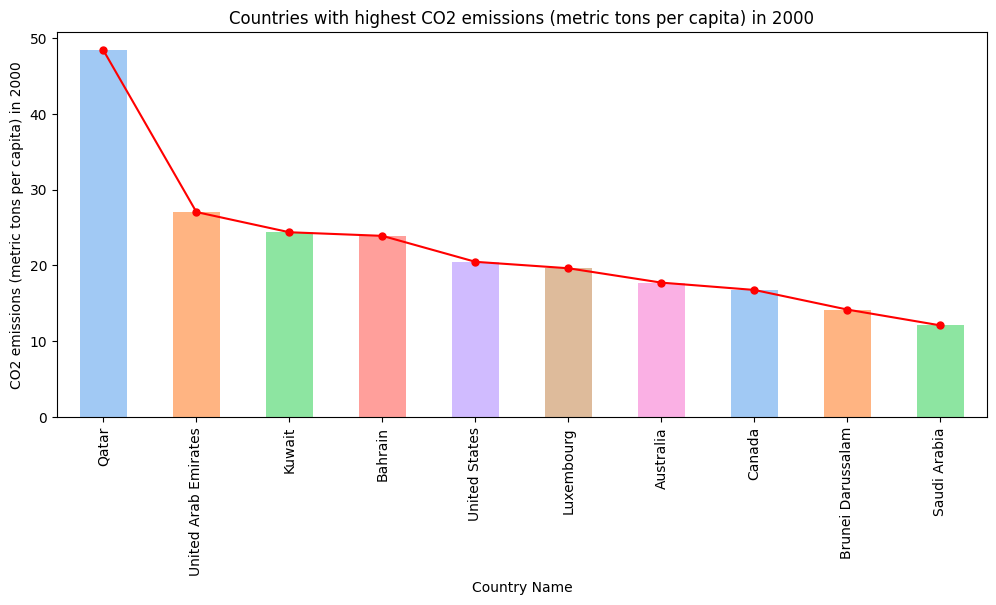

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Countries with highest CO2 emissions (metric tons per capita) in 2000')
plt.ylabel('CO2 emissions (metric tons per capita) in 2000')
df.groupby('Country Name')['2000'].sum().sort_values(ascending=False)[0:10].plot(kind='line', marker='.', color='red', ms=10)
df.groupby('Country Name')['2000'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color=sns.color_palette("pastel", 7))
plt.show()

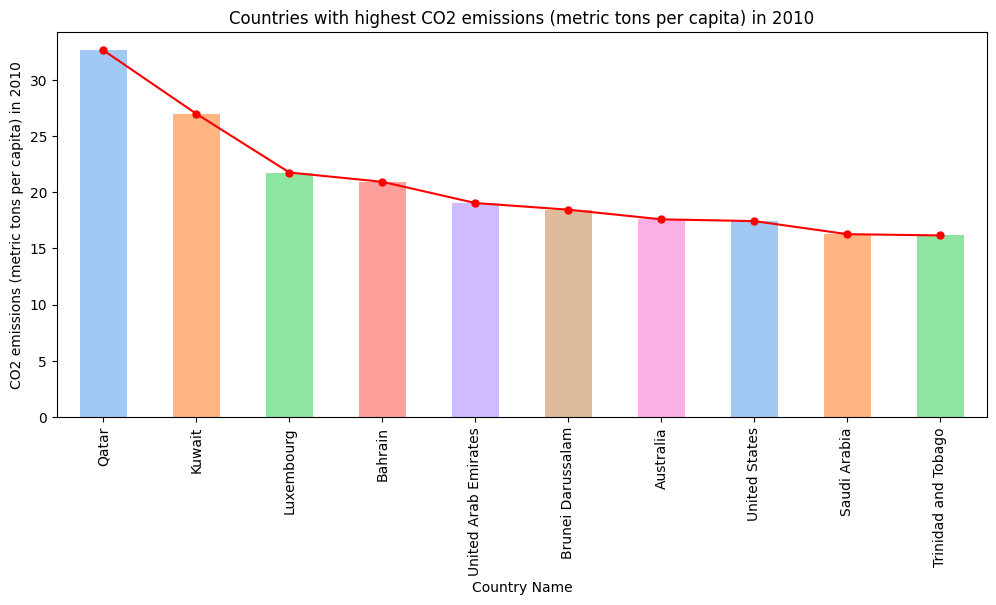

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Countries with highest CO2 emissions (metric tons per capita) in 2010')
plt.ylabel('CO2 emissions (metric tons per capita) in 2010')
df.groupby('Country Name')['2010'].sum().sort_values(ascending=False)[0:10].plot(kind='line', marker='.', color='red', ms=10)
df.groupby('Country Name')['2010'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color=sns.color_palette("pastel", 7))
plt.show()

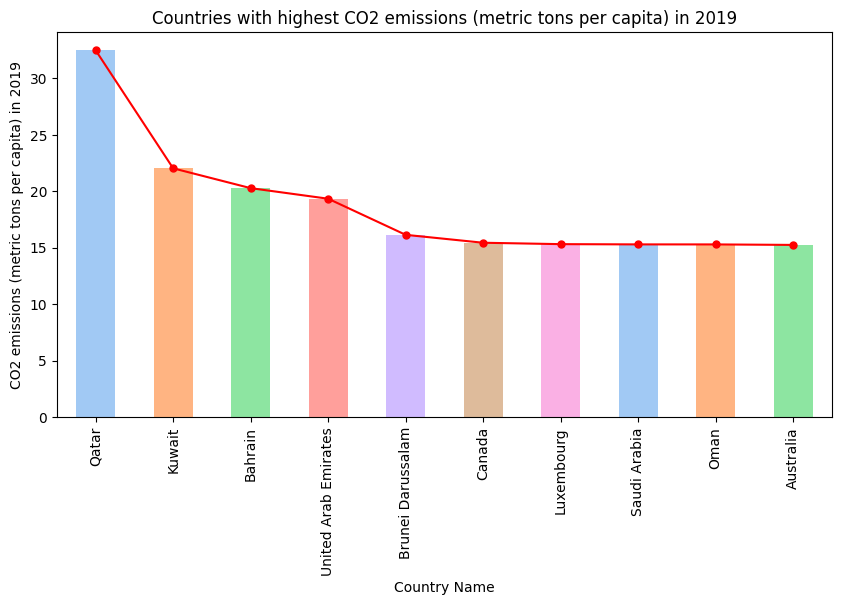

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Countries with highest CO2 emissions (metric tons per capita) in 2019')
plt.ylabel('CO2 emissions (metric tons per capita) in 2019')
df.groupby('Country Name')['2019'].sum().sort_values(ascending=False)[0:10].plot(kind='line', marker='.', color='red', ms=10)
df.groupby('Country Name')['2019'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color=sns.color_palette("pastel", 7))
plt.show()

Text(0.5, 1.0, 'Region Wide Co2 Emission Mark in 2010')

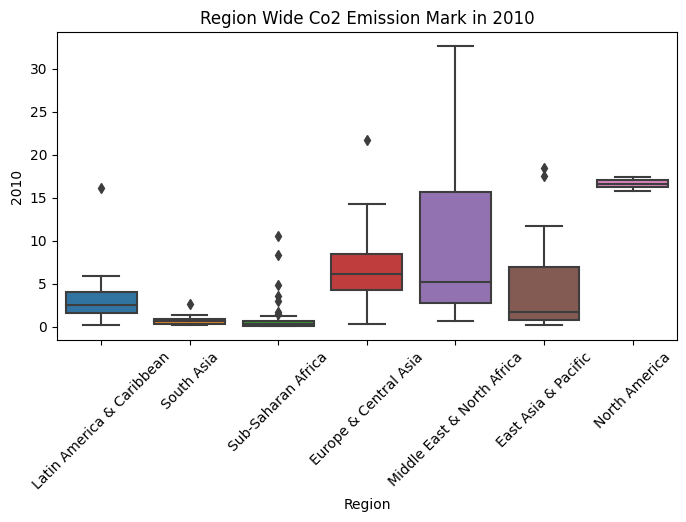

In [ ]:
plt.figure(figsize = (8,4))
ax = sns.boxplot(x='Region', y='2010', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Region Wide Co2 Emission Mark in 2010')

Text(0.5, 1.0, 'Region Wide Co2 Emission Mark in 2019')

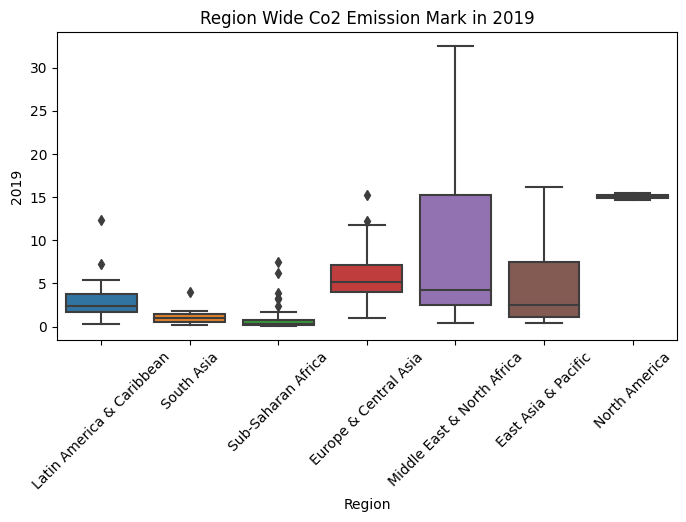

In [ ]:
plt.figure(figsize = (8, 4))
ax = sns.boxplot(x='Region', y='2019', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.title('Region Wide Co2 Emission Mark in 2019')

In [ ]:
Carbon_DataframeTemp = df
Carbon_Dataframe1 = Carbon_DataframeTemp.melt(id_vars=["Country Name","country_code","Region", "Indicator Name"],var_name="Date", value_name="Carbon_Value")
Carbon_df = Carbon_Dataframe1[Carbon_Dataframe1['Date'] != '2019.1']
Carbon_df.head( )

,Country Name,country_code,Region,Indicator Name,Date,Carbon_Value
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),1990,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),1990,0.191745
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),1990,0.553662
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1990,1.819542
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),1990,7.521832


In [ ]:
fig = px.choropleth(
    Carbon_df,
    locations="country_code",
    color="Carbon_Value",
    hover_name="Country Name",
    hover_data=["Carbon_Value"],
    title="CO2 Emission metric tons per capita",
    color_continuous_scale=px.colors.sequential.Blues,
    animation_frame='Date'

)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()